Importation des données

In [3]:
import pandas as pd

In [7]:
df_salarie= pd.read_excel("Table Salariés.xlsx" )

df_salarie.head()


,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,Solenne Delannoy,607958599.0,1955-07-07,Célibataire,1.0
1,16661123-8764,H,Nicolas Jaccoud,660029842.0,1970-09-22,Célibataire,3.0
2,16230718-4297,F,Alexandra Auguste,629910592.0,1965-03-01,Marié,1.0
3,16130305-6954,F,Marie-Claire Besnard,685888970.0,1963-09-02,NaN,1.0
4,16360125-5924,F,Marie Berengar,624840475.0,1959-04-02,Marié,3.0


In [35]:
df_salarie.shape


(257, 7)

In [9]:
df_info_pro = pd.read_excel("Table info_pro.xlsx")

df_info_pro.head()
df_info_pro.shape

(257, 6)

In [38]:
df_remuneration = pd.read_excel("Table remuneration.xlsx")

df_remuneration.head()
df_remuneration.shape

(257, 7)

On se retrouve avec trois fichiers de même dimension en terme de lignes.

Nous vérifions maintenant la présence de valeurs nulles

In [27]:
df_salarie.isnull().sum()

,0
id_salarié,0
Sexe,1
Prénom/Nom,1
Telephone,1
Date_naissance,1
Etat Civil,83
Enfants,1


Pour l'étude, nous allons annonimiser le fichier Salarié (qui est surement un fichier RH). Nous garderons exclusivement l'ID du Salarié et son sexe.

Il sera possible grâce à l'ID du salarié de retrouver les noms des personnes si les RH de l'entreprise le demande.

In [53]:
df_salarie2 = df_salarie.drop(['Etat Civil','Prénom/Nom','Telephone','Date_naissance','Enfants'], axis=1)
df_salarie2.isnull().sum()

df_salarie3= df_salarie2.dropna()
df_salarie3.shape

(256, 2)

Valeurs nulles présentes dans le fichier Informations pro, nous décidons de ne pas garder les lignes avec des valeurs manquantes car elles représentent peu de "poids" dans le fichier.

In [28]:
df_info_pro.isnull().sum()

,0
id_salarié,0
Ancienneté_an,1
Distance domicile/Travail,1
Service,1
Work_accident,1
Niveau de satisfaction,1


In [48]:
df_info_pro2 = df_info_pro.dropna()

df_info_pro2.shape

(256, 6)

Valeurs nulles présentes dans le fichier Rémunération, nous décidons de ne pas garder les lignes avec des valeurs manquantes car elles représentent peu de "poids" dans le fichier.

In [30]:
df_remuneration.isnull().sum()

,0
id_salarié,0
Contrat,1
Durée hebdo,1
Salaire base mensuel,1
%variable_moyen,1
Augmentation,16
Promotion,16


In [49]:
df_remuneration2 = df_remuneration.dropna()

df_remuneration2.shape

(241, 7)

Jointure Table Info pro et remuneration avec Salarié

In [54]:
df_transition = pd.merge(df_info_pro2, df_salarie3, how='outer', on='id_salarié')

df_transition.head()

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Sexe
0,16000206-8278,12.6,59.0,Marketing,Non,67.0,F
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0,F
2,16020327-1465,11.9,65.0,RH,Non,59.0,F
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0,F
4,16020725-8401,7.9,59.0,Consultant,Non,34.0,F


In [55]:
df = pd.merge(df_transition, df_remuneration2, how='outer', on='id_salarié')

df.head()

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Sexe,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16000206-8278,12.6,59.0,Marketing,Non,67.0,F,CDI,35.0,6583.8500,13.0,1.0,1.0
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0,F,CDI,24.0,4974.3200,32.0,0.0,1.0
2,16020327-1465,11.9,65.0,RH,Non,59.0,F,CDI,32.0,8860.8000,19.0,1.0,1.0
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0,F,CDI,35.0,8328.0167,14.0,1.0,0.0
4,16020725-8401,7.9,59.0,Consultant,Non,34.0,F,CDI,35.0,7304.2667,17.0,1.0,0.0


In [61]:
#Vérification valeur nulle sur le df final
df.isnull().sum()

,0
id_salarié,0
Ancienneté_an,0
Distance domicile/Travail,0
Service,0
Work_accident,0
Niveau de satisfaction,0
Sexe,0
Contrat,15
Durée hebdo,15
Salaire base mensuel,15


In [62]:
df1 = df.dropna()

df1.shape

(241, 13)

Traitement des données

In [63]:
df1.describe()

,Ancienneté_an,Distance domicile/Travail,Niveau de satisfaction,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,13.905809,39.004149,50.609959,33.825726,5488.341799,20.215768,0.518672,0.518672
std,6.545778,19.651865,27.644419,3.286767,2490.346070,11.507385,0.500691,0.500691
min,2.500000,3.000000,1.000000,24.000000,1059.760000,0.000000,0.000000,0.000000
25%,8.200000,23.000000,31.000000,35.000000,3335.150000,11.000000,0.000000,0.000000
50%,13.700000,41.000000,50.000000,35.000000,5448.560000,19.000000,1.000000,1.000000
75%,20.000000,57.000000,72.000000,35.000000,7637.933300,30.000000,1.000000,1.000000
max,25.000000,70.000000,100.000000,35.000000,9999.383300,40.000000,1.000000,1.000000


In [103]:
import matplotlib.pyplot as plt

Répartition global Homme/Femme

,proportion
Sexe,
H,52.697095
F,47.302905


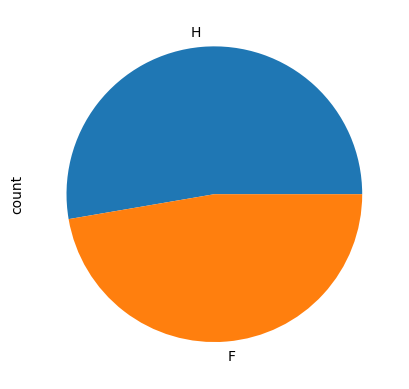

In [83]:
df1['Sexe'].value_counts().plot(kind='pie')
df1['Sexe'].value_counts(normalize=True)*100

Répartition par type de contrat

  Sexe Contrat  Nb total
0    F     CDI       114
1    H     CDD         1
2    H     CDI       126


<Axes: >

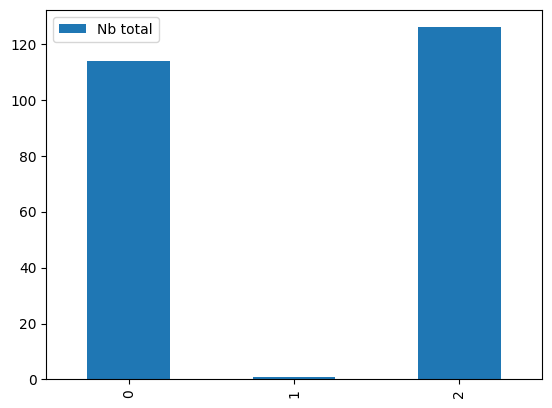

In [98]:
df_contrat = df.groupby(['Sexe', 'Contrat']).size().reset_index(name='Nb total')
print(df_contrat)

df_contrat.plot(kind='bar')

Répartition par service

   Sexe          Service  Nb total
5     F               RH        24
11    H               RH        19
4     F              R&D         3
10    H              R&D        12
3     F        Marketing        15
9     H        Marketing        21
2     F       Consultant        30
8     H       Consultant        39
1     F  Compta Finances        24
7     H  Compta Finances        17
0     F       Commercial        29
6     H       Commercial        23


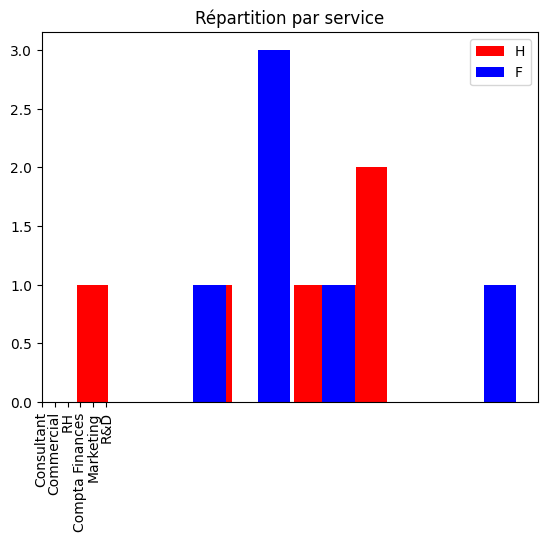

In [166]:
df_service = df.groupby(['Sexe', 'Service']).size().reset_index(name='Nb total').sort_values('Service', ascending=False)
print(df_service)

import numpy as np
g = df1.groupby("Sexe")
df1_F= g.get_group('F')['Service'].value_counts()
df1_M= g.get_group('H')['Service'].value_counts()
d_service = df1['Service'].value_counts().index
genre = df1['Sexe'].value_counts().index
pos=np.arange(len(d_service))
width = 0.25

plt.hist(df1_F,color='red')
plt.hist(df1_M,color='blue' )
plt.xticks(pos+width, d_service, rotation ='vertical')
plt.legend(genre, loc='upper right')
plt.title('Répartition par service')
plt.show()

   Sexe          Service  Nb total
5     F               RH        24
11    H               RH        19
4     F              R&D         3
10    H              R&D        12
3     F        Marketing        15
9     H        Marketing        21
2     F       Consultant        30
8     H       Consultant        39
1     F  Compta Finances        24
7     H  Compta Finances        17
0     F       Commercial        29
6     H       Commercial        23


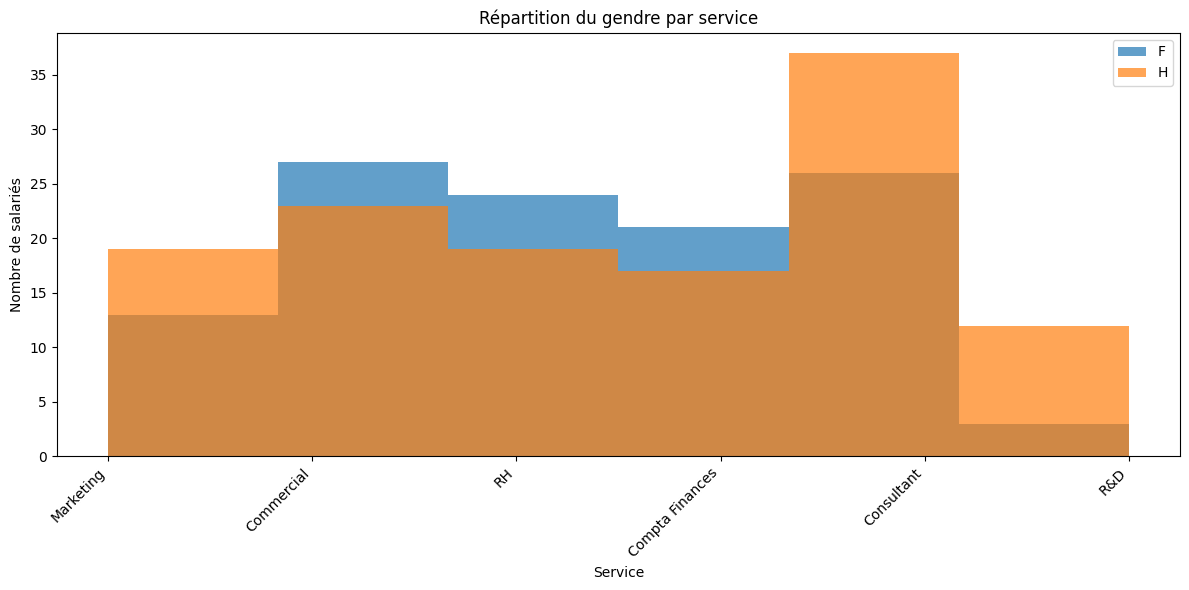

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_service = df.groupby(['Sexe', 'Service']).size().reset_index(name='Nb total').sort_values('Service', ascending=False)
print(df_service)


plt.figure(figsize=(12, 6))

for sexe in df1['Sexe'].unique():
  df_sexe = df1[df1['Sexe'] == sexe]
  plt.hist(df_sexe['Service'], bins=len(df1['Service'].unique()), alpha=0.7, label=sexe)

plt.xlabel('Service')
plt.ylabel('Nombre de salariés')
plt.title('Répartition du gendre par service')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Répartition par accident de travail

  Sexe Work_accident  Nb total
0    F           Non        62
1    F           Oui        63
2    H           Non        65
3    H           Oui        66


<Axes: ylabel='count'>

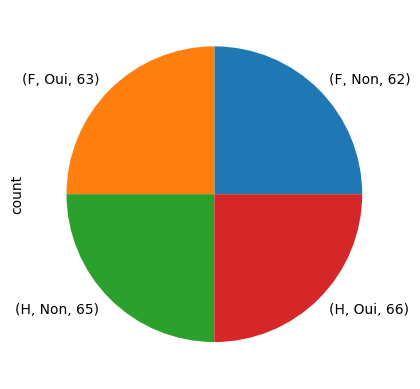

In [139]:
df_accident = df.groupby(['Sexe', 'Work_accident']).size().reset_index(name='Nb total')
print(df_accident)


df_accident.value_counts().plot(kind='pie')

In [135]:
df_accident.value_counts(normalize=True)*100

,proportion
62,25.0
63,25.0
65,25.0
66,25.0


Répartition par salaire annuel


Sexe
F    5509.499588
H    5469.349769
Name: Salaire base mensuel, dtype: float64


<Axes: xlabel='Sexe'>

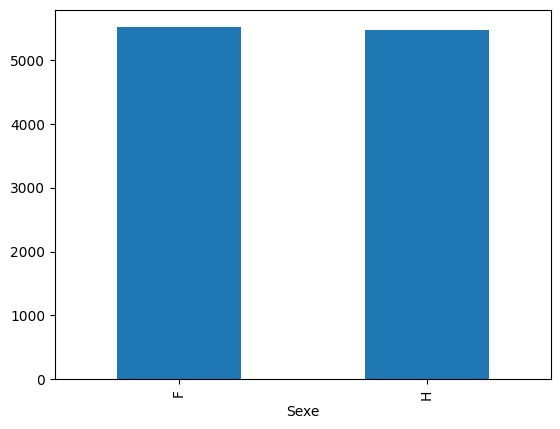

In [172]:
df_salaire = df.groupby('Sexe')['Salaire base mensuel'].mean()

print(df_salaire)

df_salaire.plot(kind='bar')


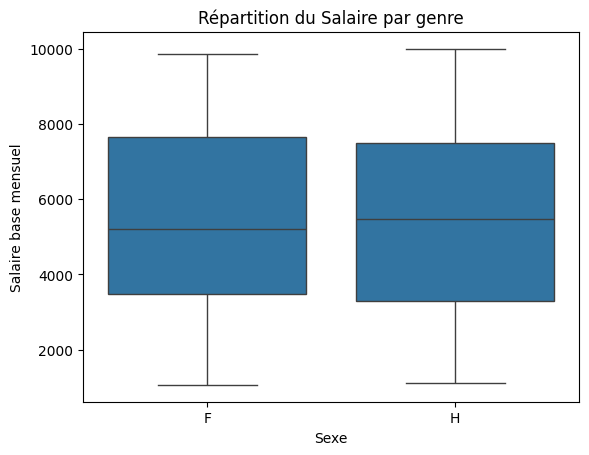

In [171]:
sns.boxplot(x='Sexe', y='Salaire base mensuel', data=df)
plt.title('Répartition du Salaire par genre')
plt.show()

Répartition par Ancienneté

Sexe
F    12.114400
H    14.159542
Name: Ancienneté_an, dtype: float64


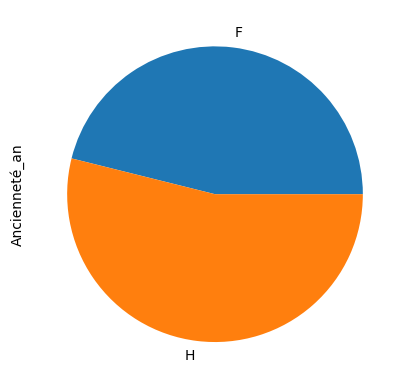

In [157]:
df_ancienneté = df.groupby('Sexe')['Ancienneté_an'].mean()

print(df_ancienneté)

df_ancienneté.plot(kind='pie')

import seaborn as sns

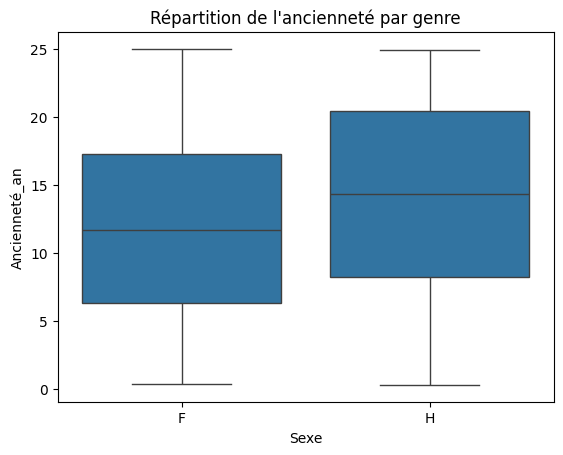

In [158]:

sns.boxplot(x='Sexe', y='Ancienneté_an', data=df)
plt.title('Répartition de l\'ancienneté par genre')
plt.show()

In [151]:
df_salarie.groupby('Sexe')['Enfants'].mean()

,Enfants
Sexe,
F,1.52000
H,1.40458


Augmentation

In [162]:
df_merged = pd.merge(df_remuneration, df_salarie3[['id_salarié', 'Sexe']], on='id_salarié', how='inner')
augmentation= df_merged.groupby('Sexe')['Augmentation'].describe()
print(augmentation)

      count      mean       std  min  25%  50%  75%  max
Sexe                                                    
F     114.0  0.561404  0.498406  0.0  0.0  1.0  1.0  1.0
H     127.0  0.480315  0.501591  0.0  0.0  0.0  1.0  1.0


In [163]:
augmentation2= df_merged.groupby('Sexe')['Augmentation'].mean()
print(augmentation2)

Sexe
F    0.561404
H    0.480315
Name: Augmentation, dtype: float64


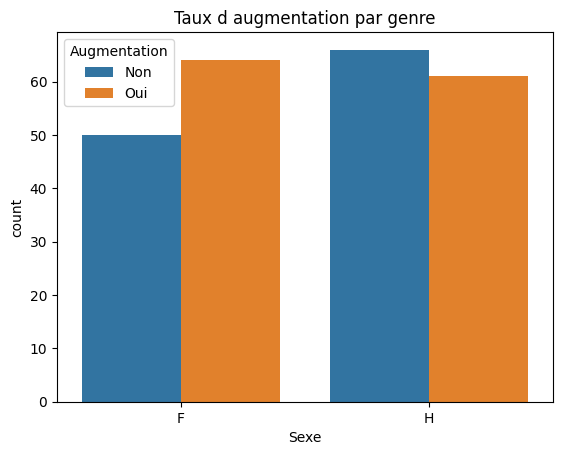

In [165]:
sns.countplot(x='Sexe', hue='Augmentation', data=df)
plt.title('Taux d augmentation par genre')
plt.xlabel('Sexe')
plt.legend(title='Augmentation', labels=['Non', 'Oui'])
plt.show()

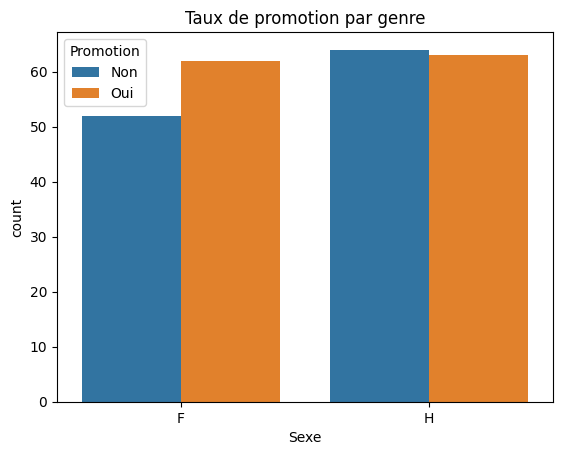

In [164]:
sns.countplot(x='Sexe', hue='Promotion', data=df)
plt.title('Taux de promotion par genre')
plt.xlabel('Sexe')
plt.legend(title='Promotion', labels=['Non', 'Oui'])
plt.show()

<ipython-input-161-779c4aef0cdd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sexe', y='Niveau de satisfaction', data=df, ci=None)


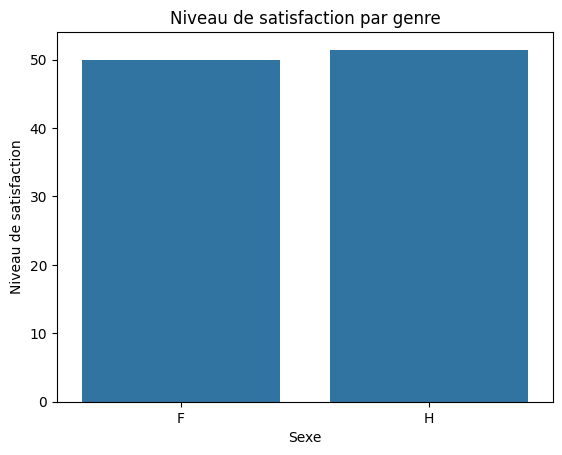

In [161]:
sns.barplot(x='Sexe', y='Niveau de satisfaction', data=df, ci=None)
plt.title('Niveau de satisfaction par genre')
plt.ylabel('Niveau de satisfaction')
plt.show()